In [11]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [12]:
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [13]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2, random_state=42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


In [15]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.01028609, 0.00990677, 0.01022649, 0.01017141, 0.00965333]), 'score_time': array([0.00247908, 0.00244164, 0.002352  , 0.00240445, 0.00260115]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [1]:
print(gs.cv_results_['mean_test_score'])

NameError: name 'gs' is not defined

In [5]:
from scipy.stats import uniform, randint
rgen = randint(0,10)
rgen.rvs(10)

array([9, 2, 5, 5, 5, 0, 8, 1, 1, 2])

In [9]:
import numpy as np
np.unique(rgen.rvs(1000), return_counts=True)
ugen = uniform(0,1)
ugen.rvs(10)

array([0.79889003, 0.74744042, 0.40659936, 0.13251921, 0.50520691,
       0.62413891, 0.23025142, 0.29970898, 0.99489937, 0.49177347])

In [17]:
params = {'min_impurity_decrease': uniform(0.0001, 0.001), 'max_depth': randint(20,50), 'min_samples_split':randint(2,25), 'min_samples_leaf':randint(1,25)}

from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)
rs.fit(train_input,train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb405c8faa0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7eb405c8e870>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb405cd27b0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7eb405c10470>},
                   random_state=42)

In [20]:
print(rs.best_params_)
print(np.max(rs.cv_results_['mean_test_score']))

{'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}
0.8695428296438884


In [23]:
dt = rs.best_estimator_
print(dt.score(test_input, test_target))

0.86


In [25]:
# 튜닝, 기본 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1) 기본 트리
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(train_input, train_target)

print("기본 트리")
print("  train score:", dt_default.score(train_input, train_target))
print("  test  score:", dt_default.score(test_input, test_target))

# 2) 튜닝된 트리 (네가 사용한 파라미터 그대로)
params = {
    'min_impurity_decrease': uniform(0.0001, 0.001),
    'max_depth': randint(20, 50),
    'min_samples_split': randint(2, 25),
    'min_samples_leaf': randint(1, 25),
}

rs = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    params,
    n_iter=100,
    n_jobs=-1,
    cv=5,
    random_state=42
)
rs.fit(train_input, train_target)

best_dt = rs.best_estimator_

print("\n튜닝된 트리(best_estimator_)")
print("  best params:", rs.best_params_)
print("  cv best score:", rs.best_score_)
print("  train score:", best_dt.score(train_input, train_target))
print("  test  score:", best_dt.score(test_input, test_target))


기본 트리
  train score: 0.996921300750433
  test  score: 0.8584615384615385

튜닝된 트리(best_estimator_)
  best params: {'max_depth': 39, 'min_impurity_decrease': np.float64(0.00034102546602601173), 'min_samples_leaf': 7, 'min_samples_split': 13}
  cv best score: 0.8695428296438884
  train score: 0.8928227823744468
  test  score: 0.86


/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1876067717.py:22: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/t

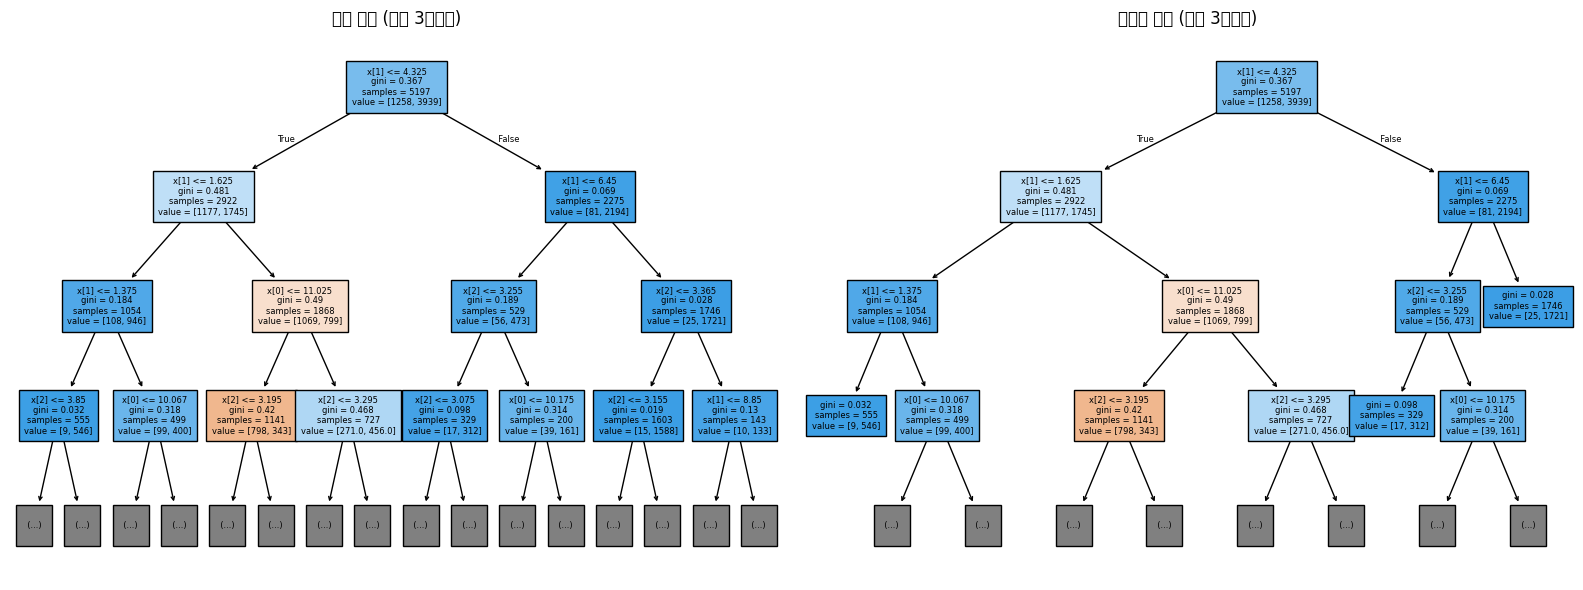

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 6))

# 왼쪽: 기본 트리
plt.subplot(1, 2, 1)
plot_tree(dt_default,
          max_depth=3,          # 너무 커서 상위 몇 레벨만
          filled=True,
          fontsize=6)
plt.title("기본 트리 (상위 3레벨만)")

# 오른쪽: 튜닝된 트리
plt.subplot(1, 2, 2)
plot_tree(best_dt,
          max_depth=3,
          filled=True,
          fontsize=6)
plt.title("튜닝된 트리 (상위 3레벨만)")

plt.tight_layout()
plt.show()
